# R(3,9) plotting!

Having found that the unique Ramsey critical graph for R(3,9)=35 is in fact the circulant graph corresponding to the differences [1,7,11,16] we try plotting thos graph.

## Imports

In [1]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Creating the graph

In [7]:
def create_circulant_graph(n: int, distances: list) ->  nx.classes.graph.Graph:
    G = nx.Graph()
    for i in range(n):
        for d in distances:
            G.add_edge(i, (i + d) % n)
    return G

In [8]:
n = 35  # You can adjust this number based on your preference
distances = [1, 7, 11, 16]

# Create the circulant graph
G = create_circulant_graph(n, distances)

## The plot

In [15]:
def circulant_layout(G, distances):
    n = G.number_of_nodes()
    pos = {}
    for i in range(n):
        angle = 2 * np.pi * i / n
        pos[i] = (np.cos(angle), np.sin(angle))
    return pos

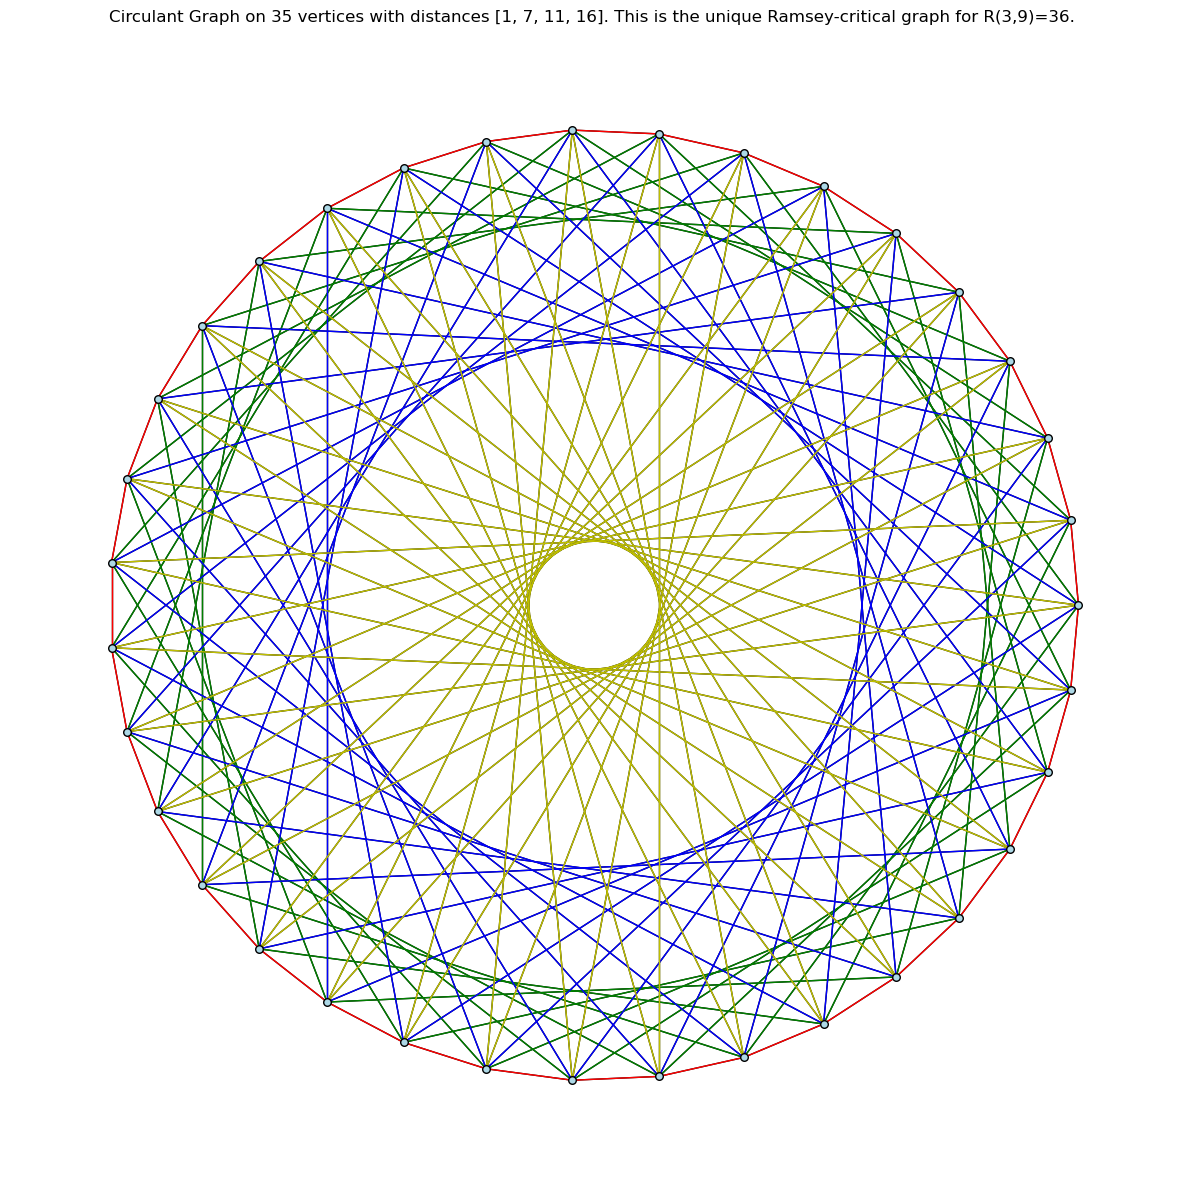

In [20]:
pos = circulant_layout(G, distances)

# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos, ax=ax, with_labels=False, node_color='lightblue', 
        node_size=30, edgecolors='black', linewidths=1)

# Draw edges with different colors for each distance
colors = ['r', 'g', 'b', 'y']
for i, d in enumerate(distances):
    edge_list = [(j, (j + d) % n) for j in range(n)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color=colors[i], ax=ax)

ax.set_title(f"Circulant Graph on 35 vertices with distances {distances}. This is the unique Ramsey-critical graph for R(3,9)=36. ")
ax.axis('off')
plt.tight_layout()
plt.show()